In [1]:
%matplotlib inline
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = np.loadtxt('../data/higgs_small.txt',delimiter=',', skiprows=1)

In [3]:
np.random.shuffle(dataset)

X = dataset[:, 0:28]
Y = dataset[:, 28]

# split data into train and test sets
seed = 7
test_size = 0.33
X_1, X_2, y_train, y_test = train_test_split(
    X, Y, test_size=test_size, random_state=seed)

In [4]:
scaler1st = StandardScaler()
X_train = scaler1st.fit_transform(X_1)
X_test = scaler1st.fit_transform(X_2)

In [5]:
clf = RandomForestClassifier(max_depth=3,n_estimators=100,n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
y_pred = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_rf = auc(fpr, tpr)

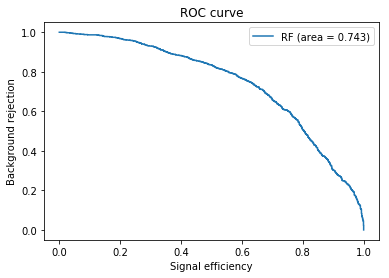

In [7]:
plt.plot(tpr,(1-fpr) , label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()